---
# AlphaCare Insurance Analysis
## Overview
This project aims to analyze historical car insurance claim data for AlphaCare Insurance Solutions (ACIS) in South Africa. The goal is to optimize marketing strategies and identify low-risk targets to reduce premiums, thereby attracting new clients.

---

## Setup

First, let's set up the environment by importing necessary libraries.

In [1]:
# Import necessary libraries and modules
import os
import sys
import pandas as pd

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.insurance_analysis import Insurance_EDA

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read and understanding data

In [2]:
#Reading the txt file MachineLearningRating_v3.txt
data_path = '../data/MachineLearningRating_v3.txt'
df=pd.read_csv(data_path, delimiter='|')


C:\Users\Coop\AppData\Local\Temp\ipykernel_8684\3554628963.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path, delimiter='|')


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

### Data Type Conversion

- Convert the `VehicleIntroDate` column to `datetime` format, coercing any invalid entries to `NaT` (Not a Time).


- Convert the `TransactionMonth` column to `datetime` format, with any invalid entries coerced to `NaT`.
  

- Convert the `RegistrationYear` column to an integer type.
  

This ensures that the columns `VehicleIntroDate` and `TransactionMonth` are properly formatted as datetime, and `RegistrationYear` is cast to integers years for further analysis.


In [7]:
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
df['TransactionMonth'] =pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['RegistrationYear'] = df['RegistrationYear'].astype(int)

C:\Users\Coop\AppData\Local\Temp\ipykernel_8684\3436019025.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


### get total null values 

In [8]:
total_null_valus = df.isnull().sum()

print(total_null_valus)

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [9]:
# Calculate the percentage of missing values in each column
missing_values = df.isnull().sum() / len(df)

# Filter the columns where more than 10% of the values are missing
high_missing_values = missing_values[missing_values > 0.1]
print(high_missing_values)

Bank                       0.145947
CustomValueEstimate        0.779566
NewVehicle                 0.153280
WrittenOff                 0.641838
Rebuilt                    0.641838
Converted                  0.641838
CrossBorder                0.999302
NumberOfVehiclesInFleet    1.000000
dtype: float64


In [10]:
# list catagroial varaible
df.select_dtypes("object").head()

,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant


### Check Duplicated rows

In [11]:
#Checking for Duplicated Rows
total_duplicates = df.duplicated().sum()

# Display the total number of duplicated rows
print(f"Total number of duplicated rows: {total_duplicates}") # we have no duplicated rows 

Total number of duplicated rows: 0


### Check cardinallity

In [12]:
# Calculate unique values for object type columns
cardinality = df.select_dtypes("object").nunique()

# Let Define thresholds as follows 
low_cardinality_threshold = 3
high_cardinality_threshold = 100000

# Filter low cardinality columns (less than 3 unique values)
low_cardinality = cardinality[cardinality < low_cardinality_threshold]

# Filter high cardinality columns (more than 100000 unique values)
high_cardinality = cardinality[cardinality > high_cardinality_threshold]

# Display the results with the number of unique values for each feature
print("Low Cardinality Features (less than 3 unique values):")
for col, n_unique in low_cardinality.items():
    print(f"{col}: {n_unique} unique values")

print("\nHigh Cardinality Features (more than 100000 unique values):")
for col, n_unique in high_cardinality.items():
    print(f"{col}: {n_unique} unique values")


Low Cardinality Features (less than 3 unique values):
Language: 1 unique values
Country: 1 unique values
ItemType: 1 unique values
AlarmImmobiliser: 2 unique values
TrackingDevice: 2 unique values
NewVehicle: 2 unique values
WrittenOff: 2 unique values
Rebuilt: 2 unique values
Converted: 2 unique values
CrossBorder: 1 unique values
TermFrequency: 2 unique values
StatutoryClass: 1 unique values
StatutoryRiskType: 1 unique values

High Cardinality Features (more than 100000 unique values):


### Let intialze the class

In [13]:
eda = Insurance_EDA(df)

## `wrangle_data` Function
### Now let do data wangling for I observed from the above  EDA
The `wrangle_data` function is designed to preprocess and clean a DataFrame. It performs several key operations to prepare the data for further analysis or modeling. Below is a breakdown of its functionality:

### Parameters

- **`null_threshold`** (float, default=0.5): The threshold for the percentage of missing values in a column above which the column will be dropped.
- **`low_cardinality_threshold`** (int, default=3): The maximum number of unique values in a categorical column below which the column will be dropped.
- **`high_cardinality_threshold`** (int, default=1000000): The minimum number of unique values in a categorical column above which the column will be dropped.

### Functionality

1. **Drop Columns with High Percentage of Missing Values**
   - Calculates the percentage of missing values for each column.
   - Drops columns where the percentage of missing values exceeds the specified `null_threshold`.

2. **Drop Low and High Cardinality Categorical Columns**
   - Identifies categorical columns with unique value counts below `low_cardinality_threshold` and above `high_cardinality_threshold`.
   - Drops these low and high cardinality categorical columns.

3. **Filter Outliers in Numeric Columns Using IQR Method**
   - Applies the Interquartile Range (IQR) method to detect and remove outliers.
   - Computes the first (Q1) and third (Q3) quartiles, calculates the IQR, and filters out values outside 1.5 times the IQR from Q1 and Q3.

4. **Fill Missing Numeric Values with Mean**
   - Fills missing values in numeric columns with the mean value of each column.

5. **Fill Missing Categorical Values with Mode**
   - Fills missing values in categorical columns with the mode (most frequent value) of each column.

In [14]:
clean_data = eda.wrangle_data()
clean_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,SumInsured,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
478,55943,5224,2014-09-01,False,,Individual,Dr,First National Bank,Current account,Not specified,...,3500.0,1.0631,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.932544,0.0
479,55943,5224,2014-11-01,False,,Individual,Dr,First National Bank,Current account,Not specified,...,3500.0,1.0631,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.932544,0.0
480,55943,5224,2015-01-01,False,,Individual,Dr,First National Bank,Current account,Not specified,...,3500.0,1.0631,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.932544,0.0
481,55943,5224,2015-04-01,False,,Individual,Dr,First National Bank,Current account,Not specified,...,3500.0,1.0631,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.932544,0.0
482,55943,5224,2015-06-01,False,,Individual,Dr,First National Bank,Current account,Not specified,...,3500.0,1.0631,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0


### Univariate Analysis:

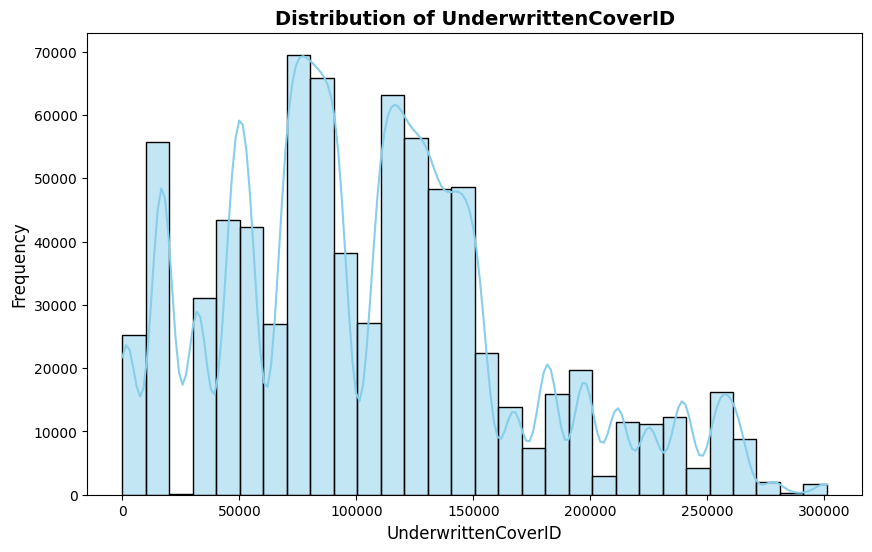

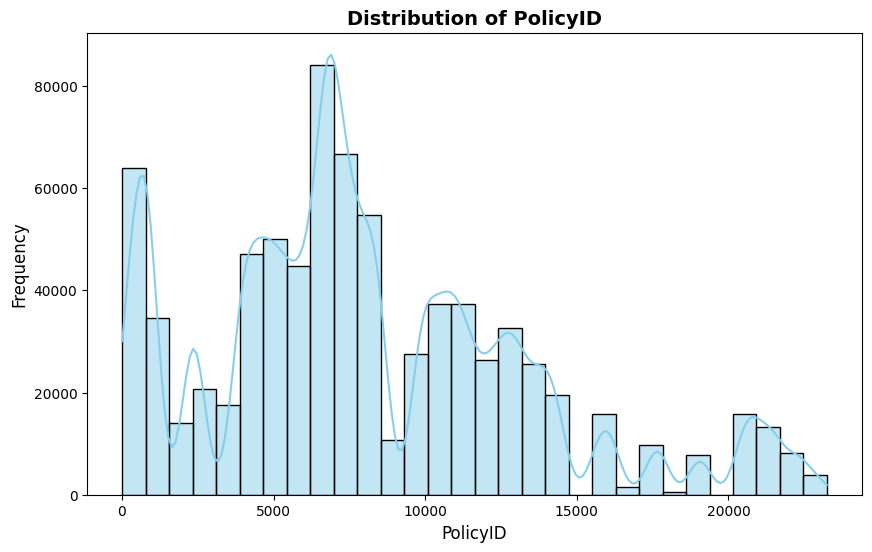

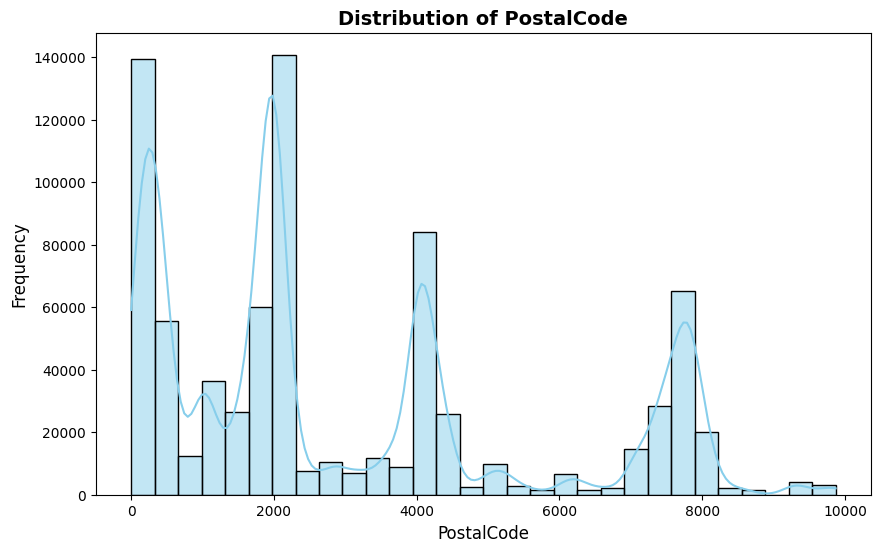

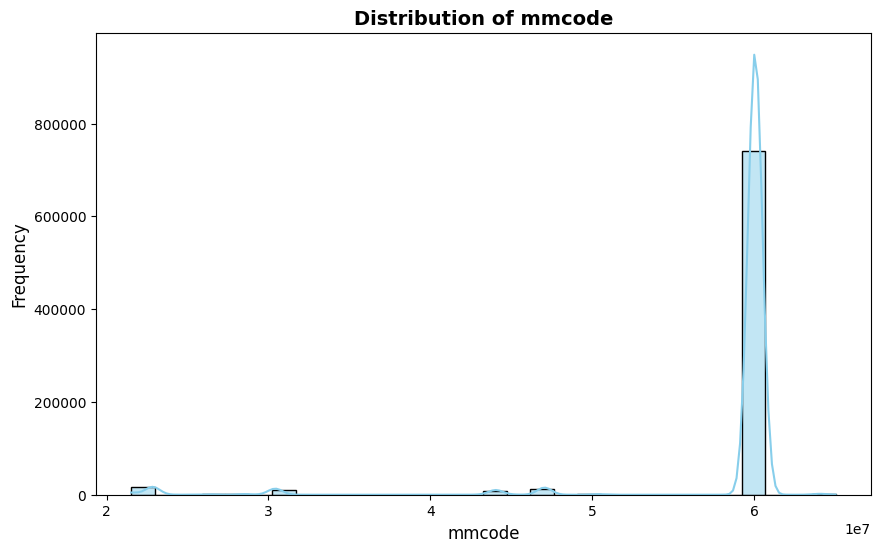

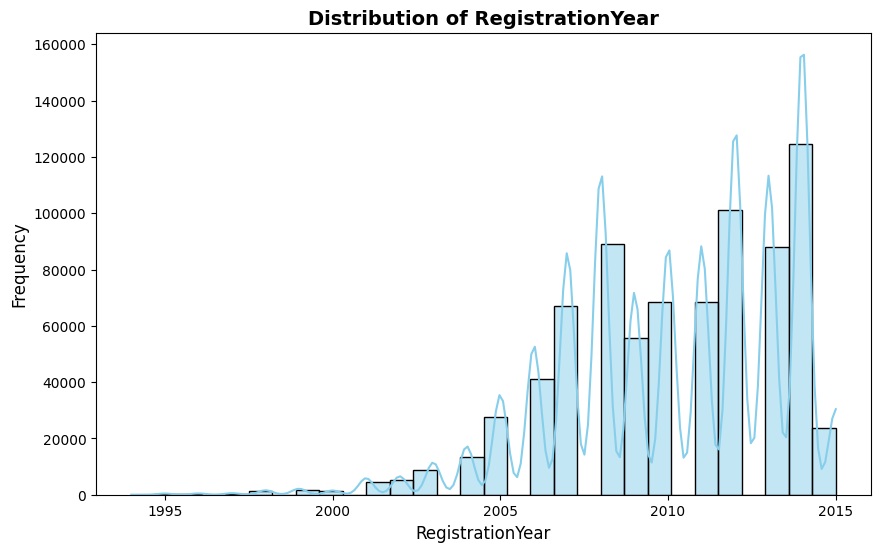

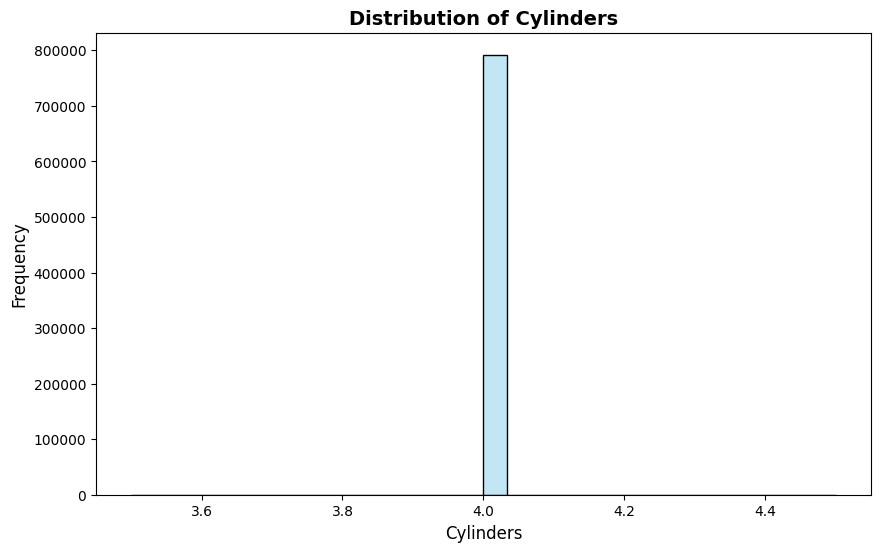

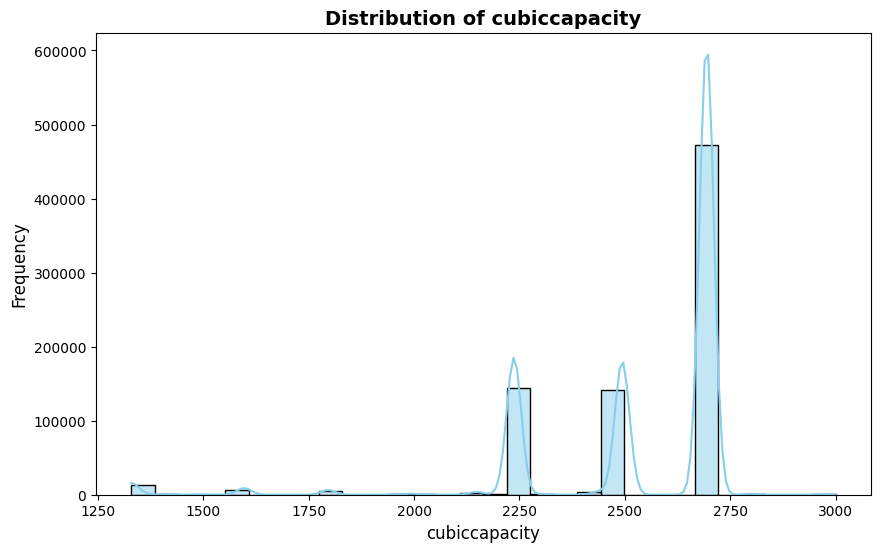

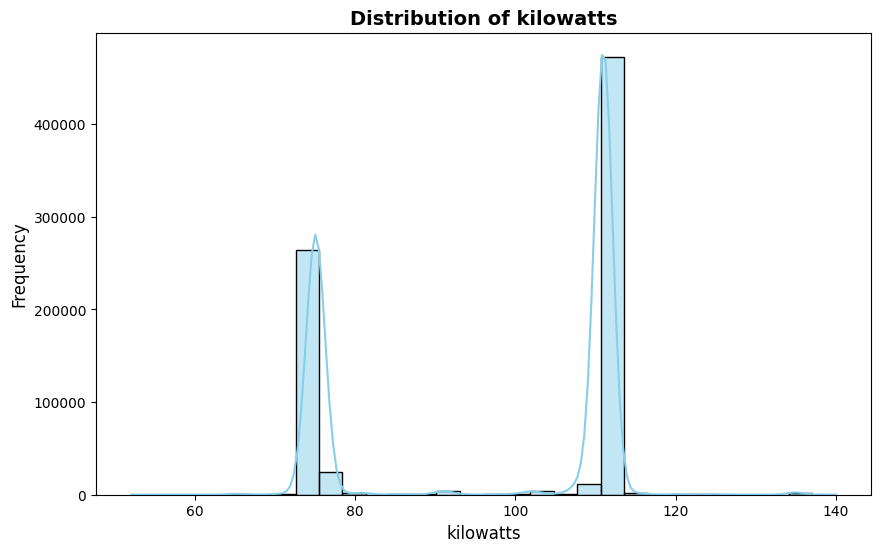

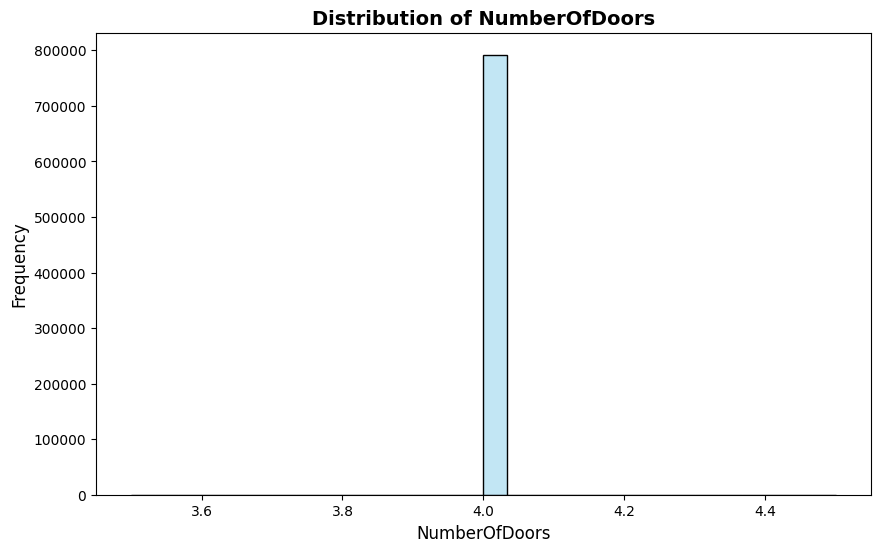

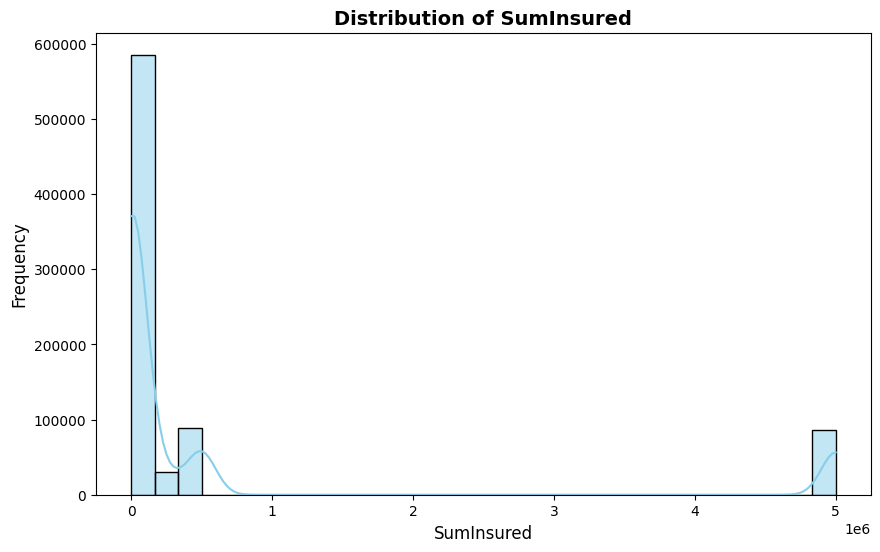

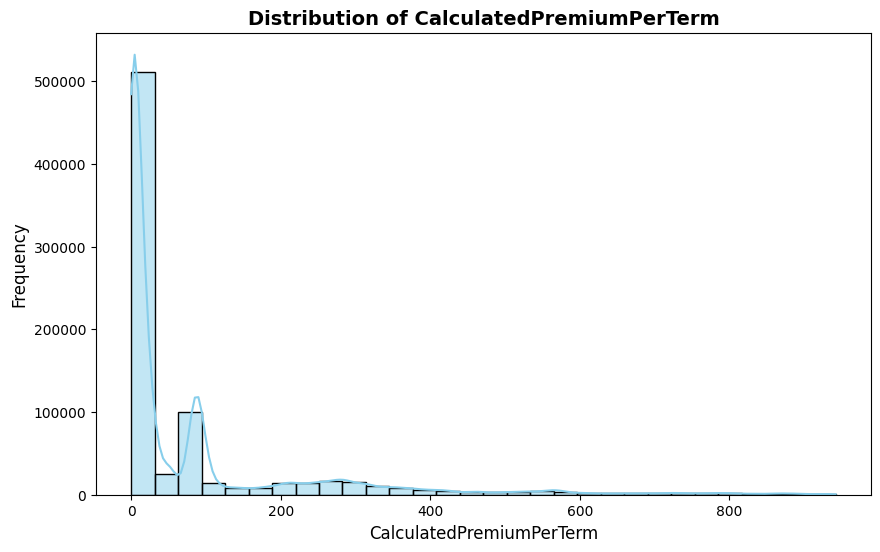

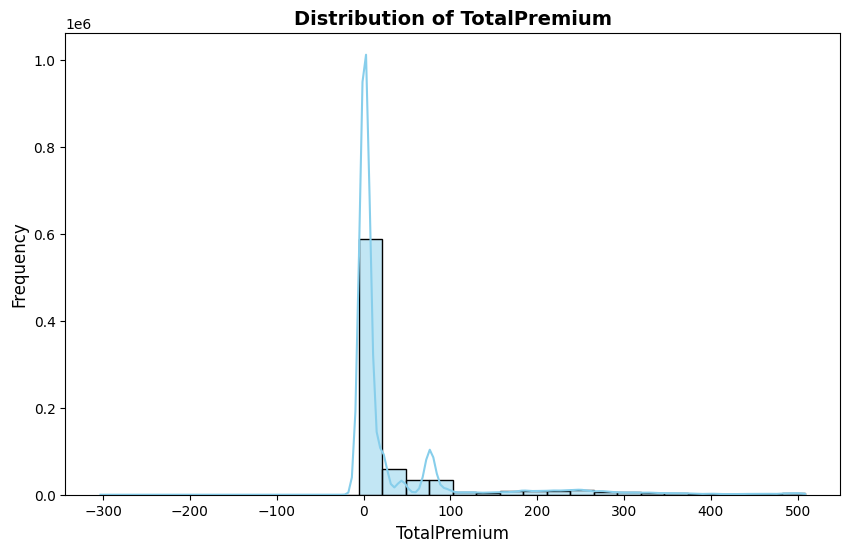

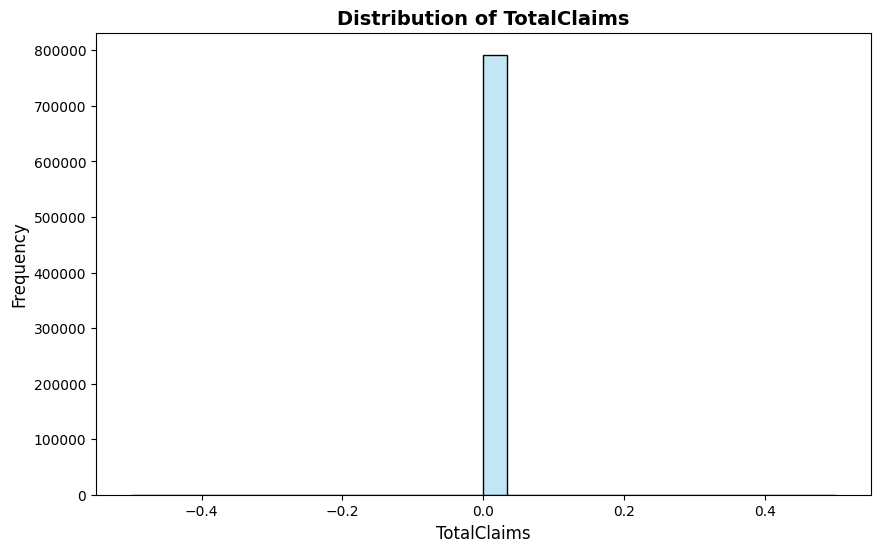

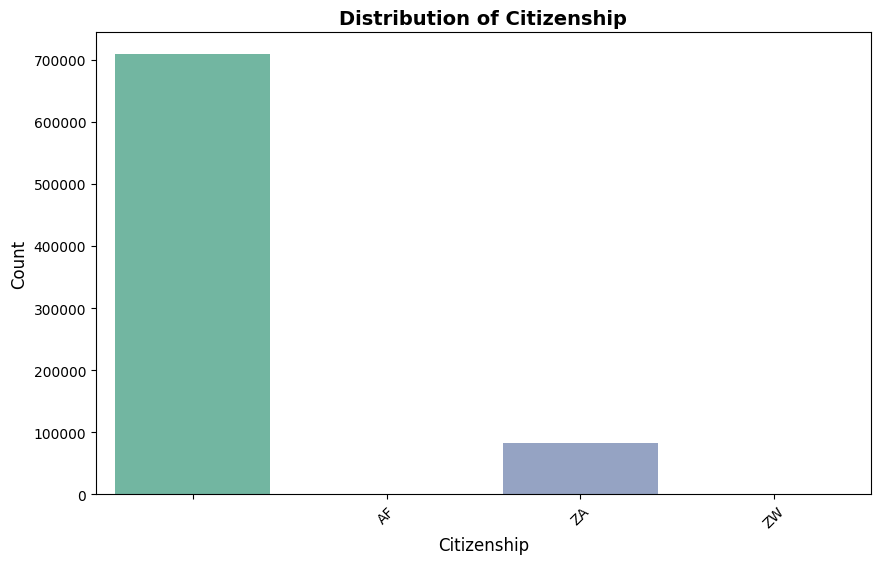

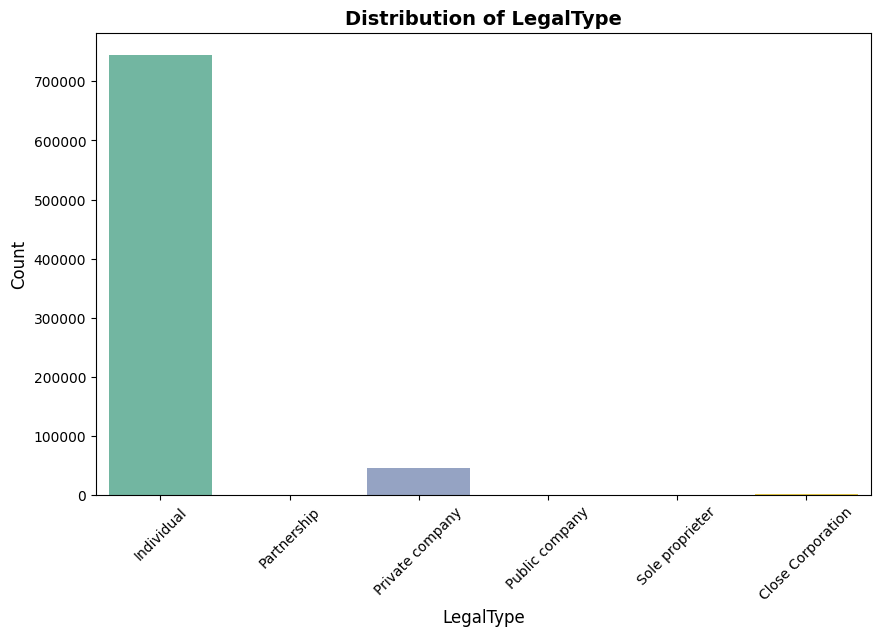

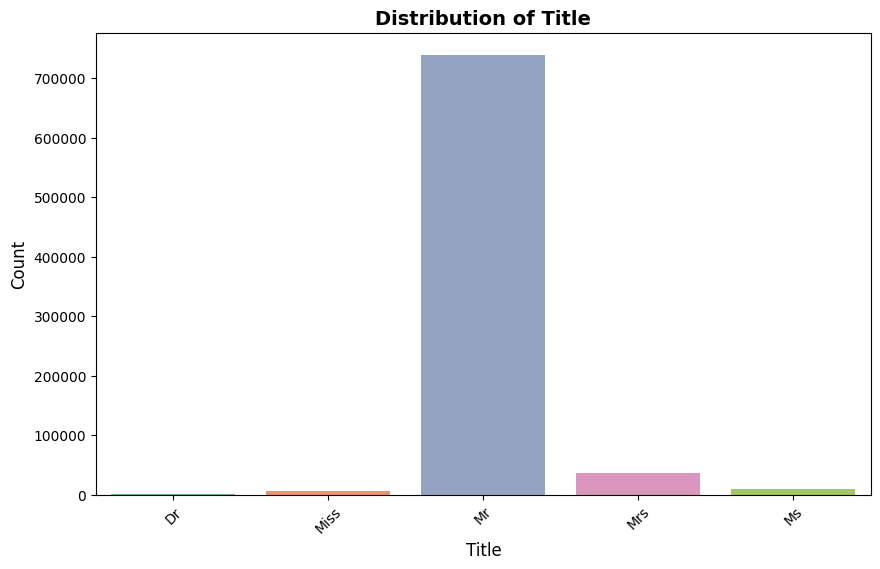

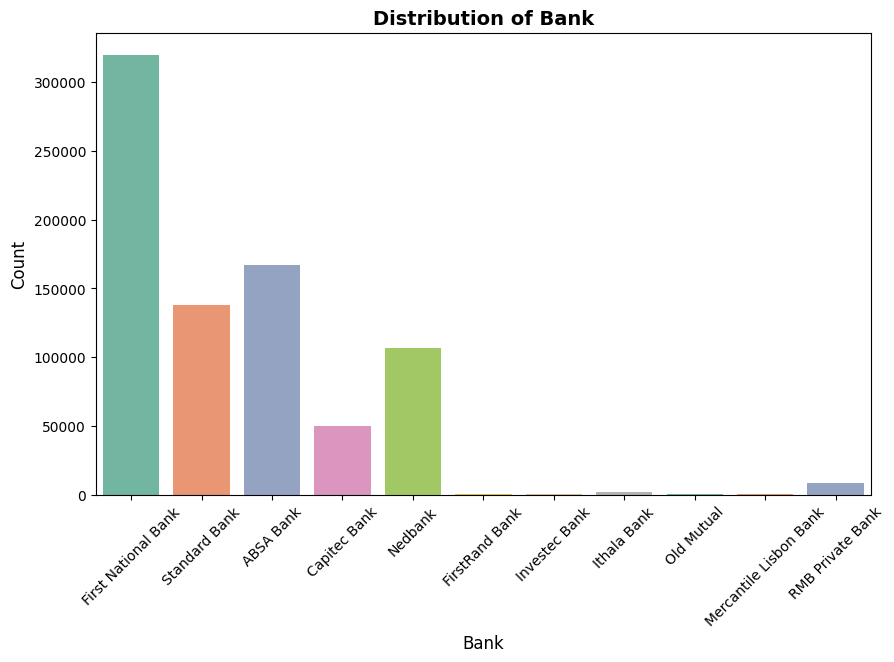

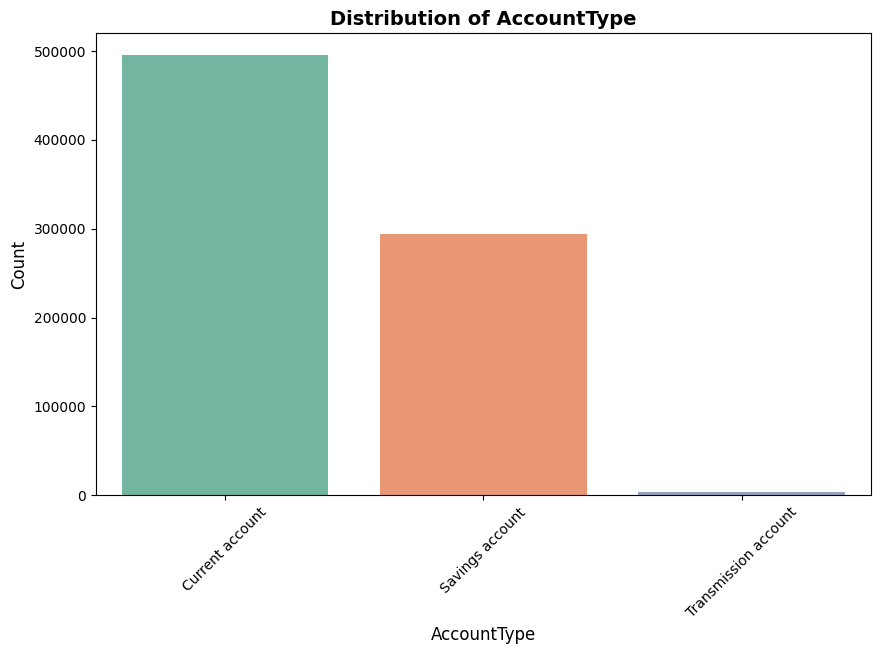

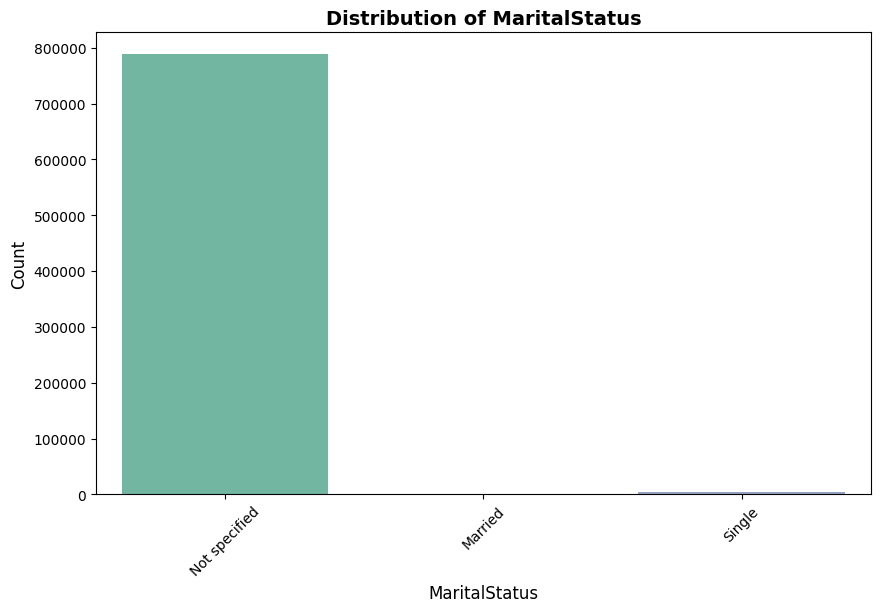

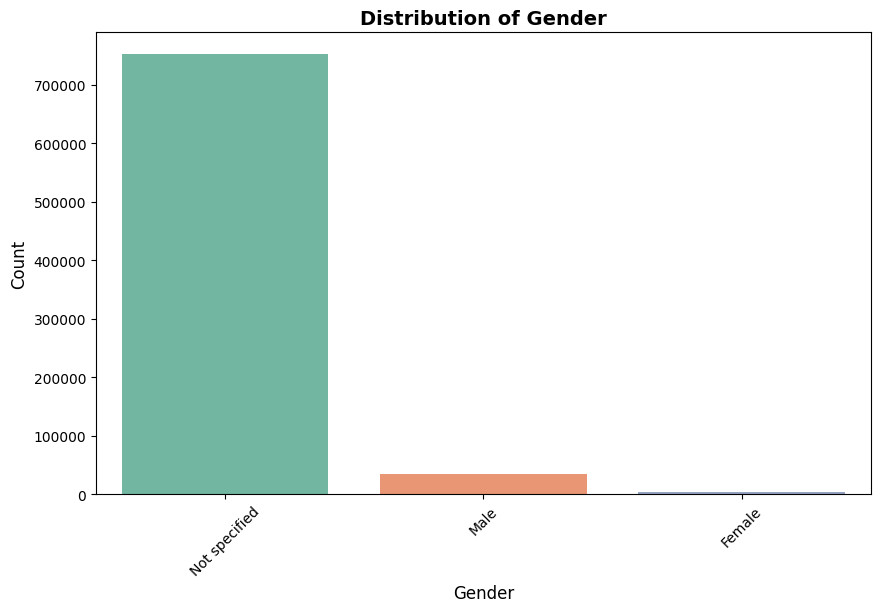

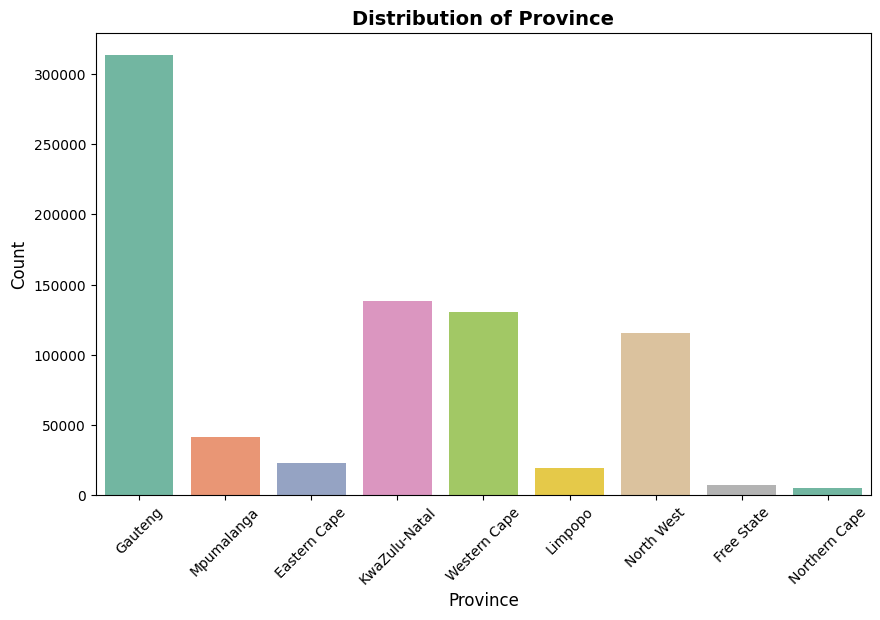

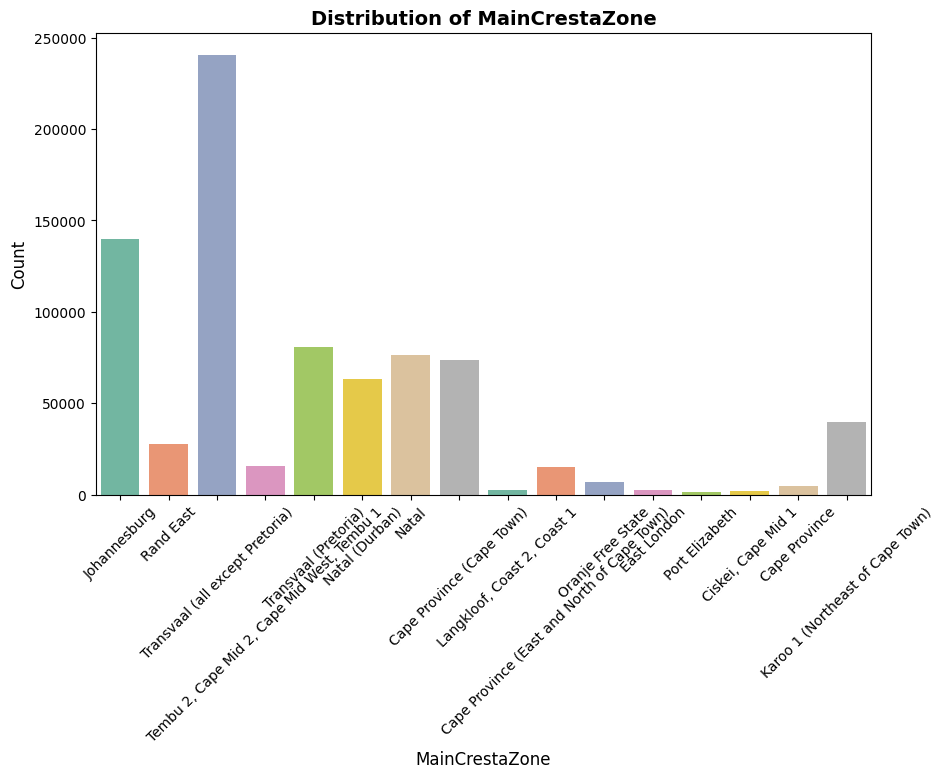

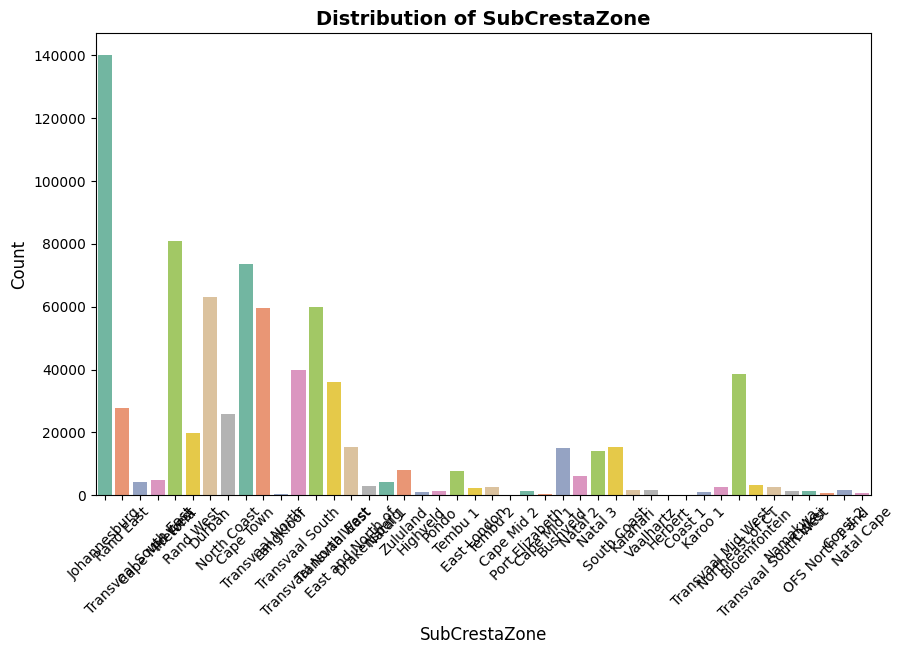

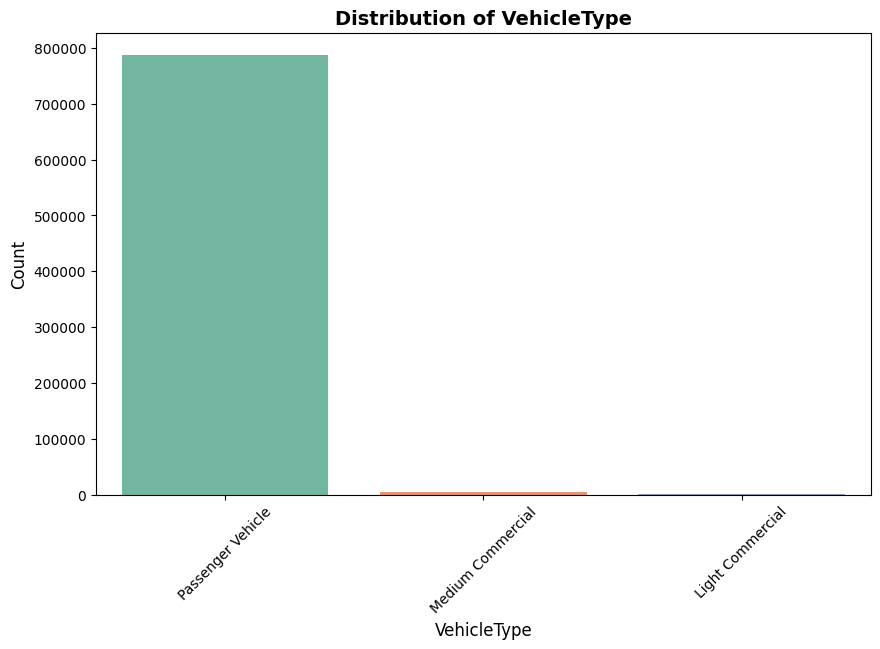

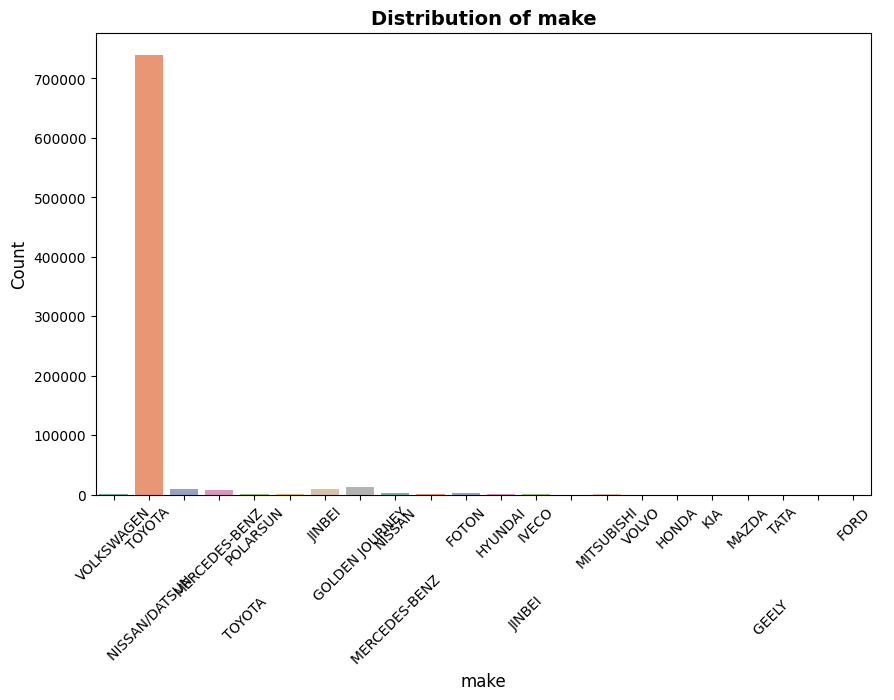

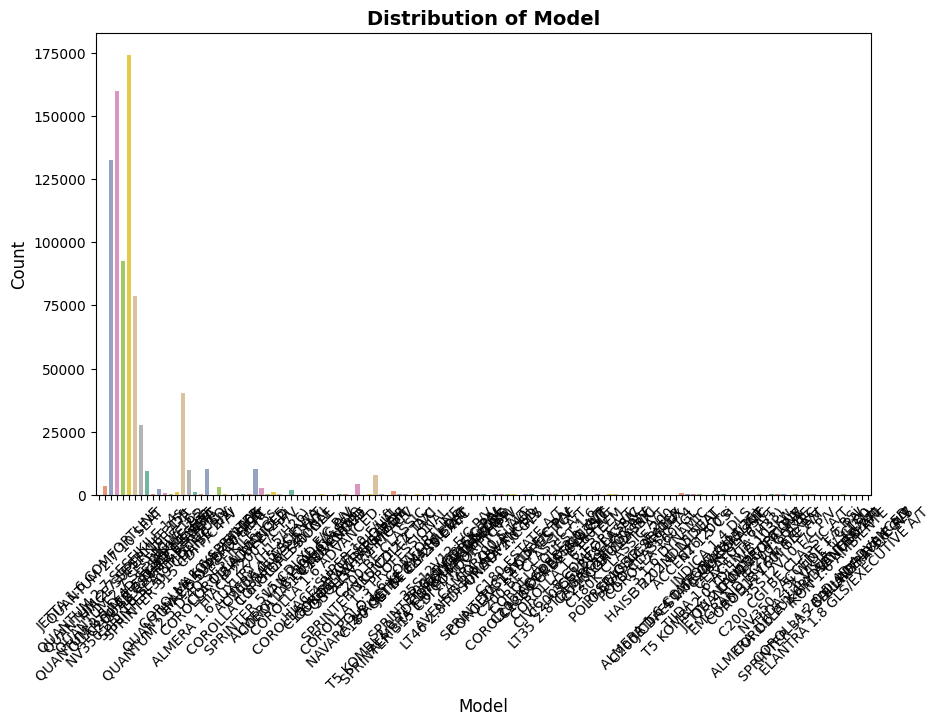

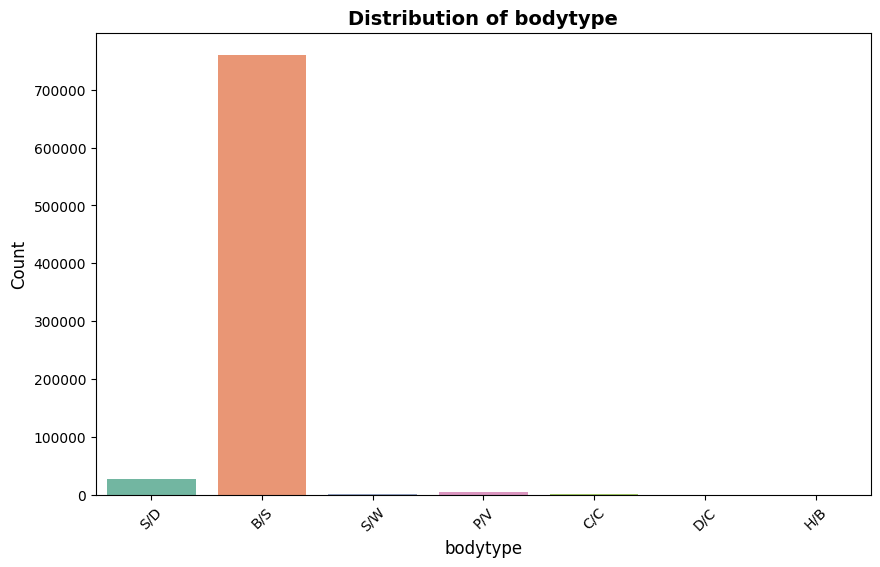

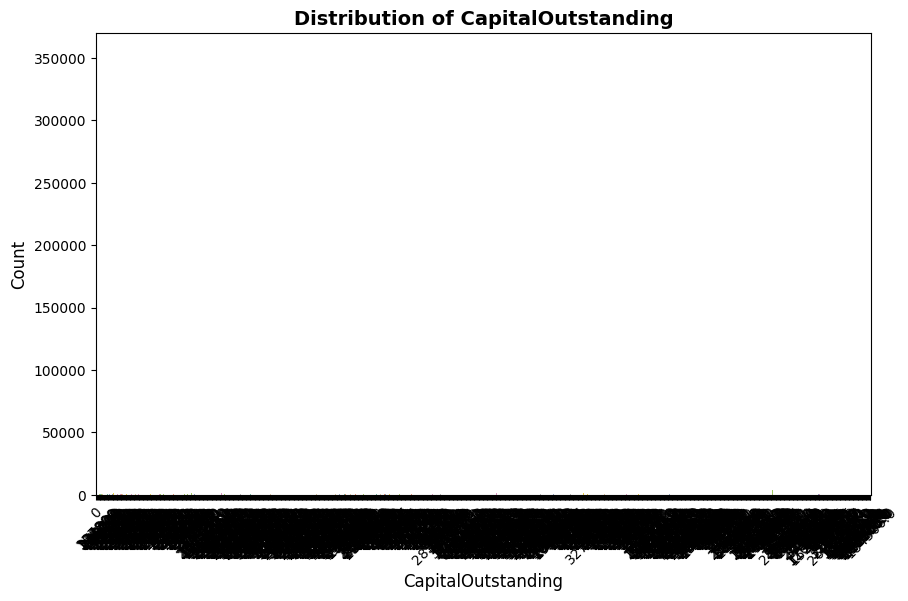

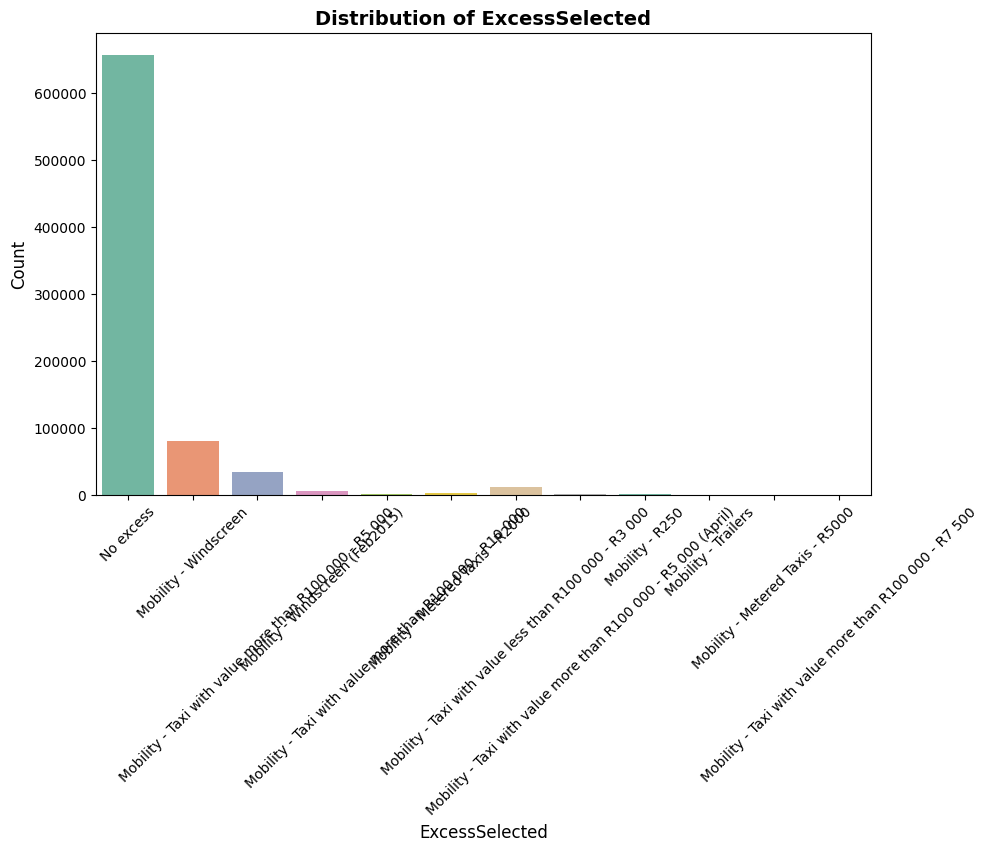

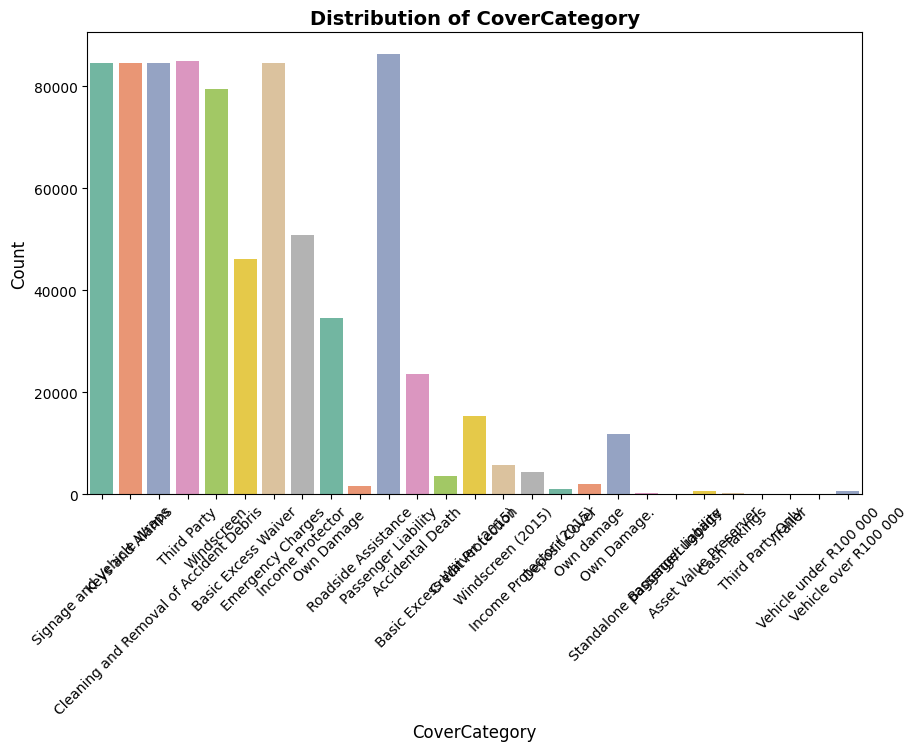

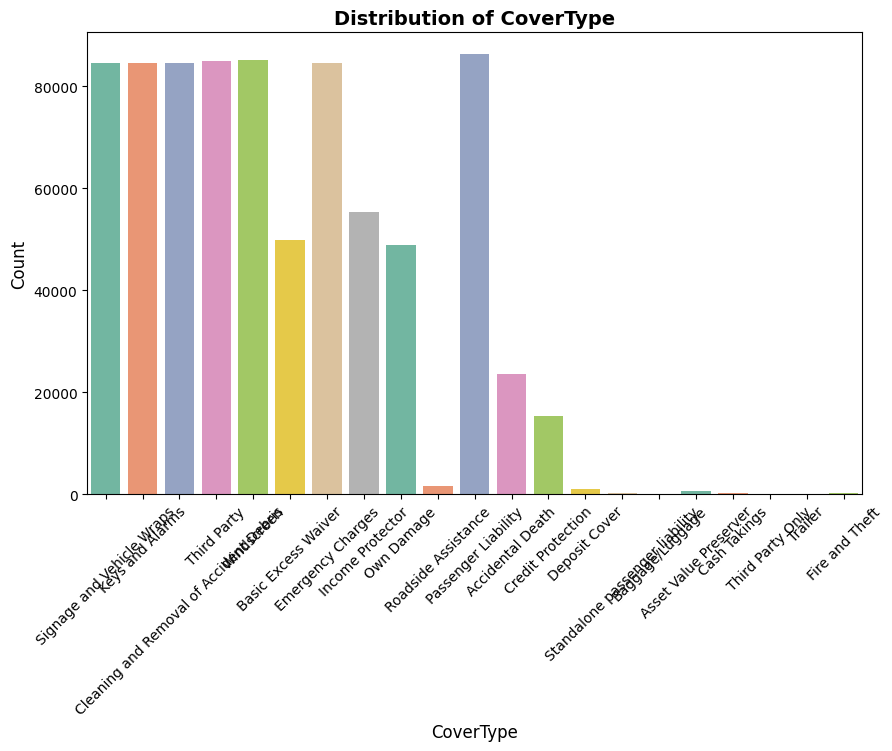

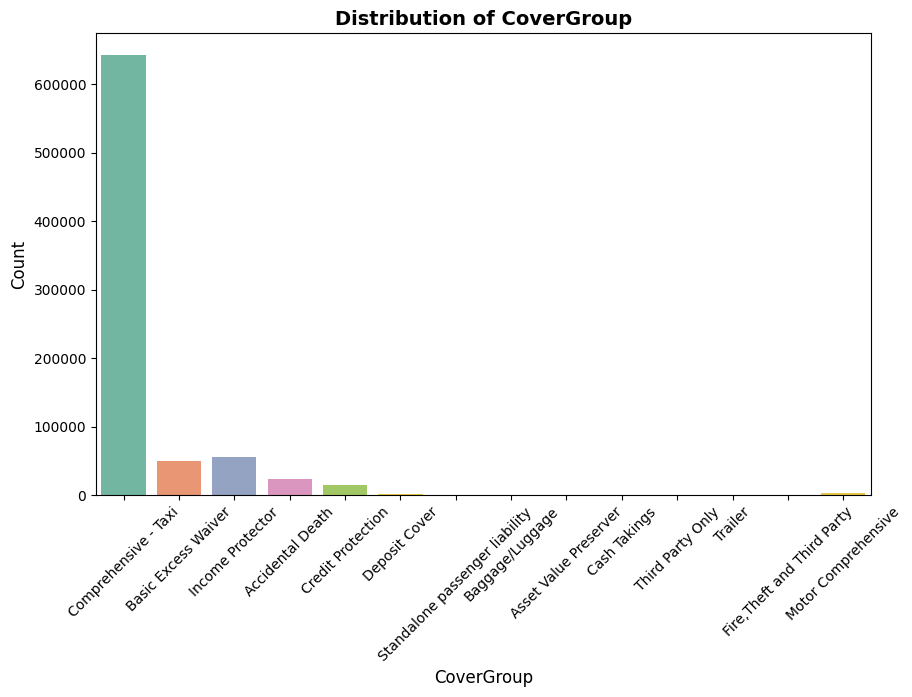

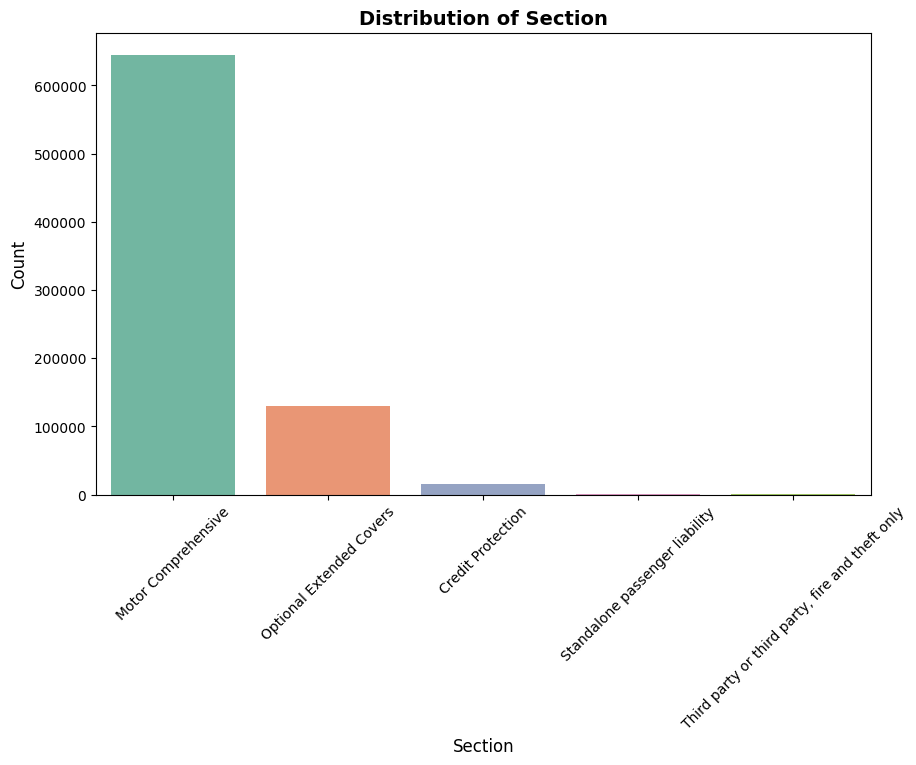

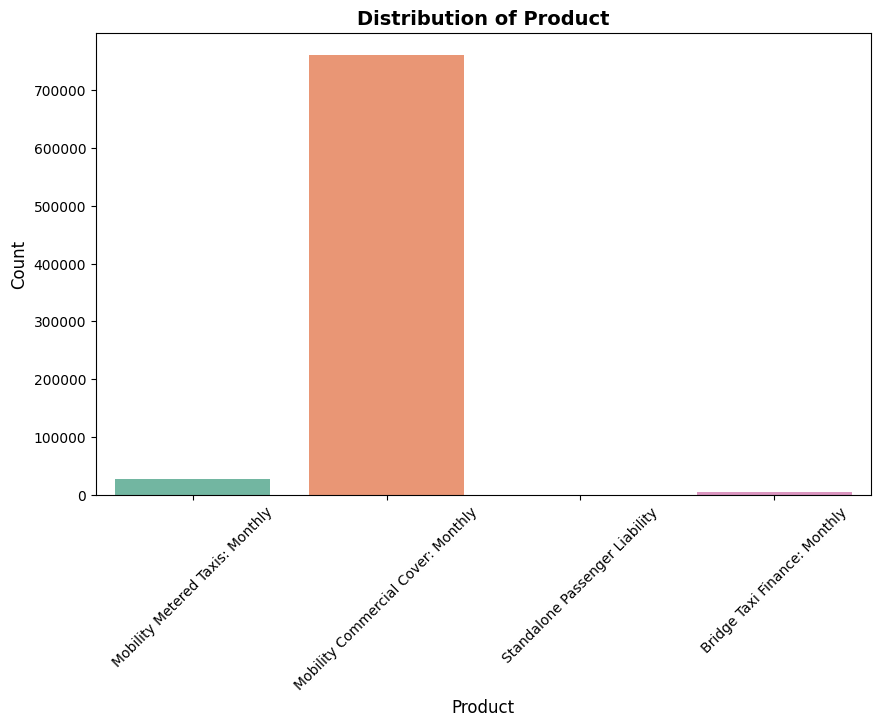

In [15]:
eda.univariate_analysis()

### Bivariate Analysis

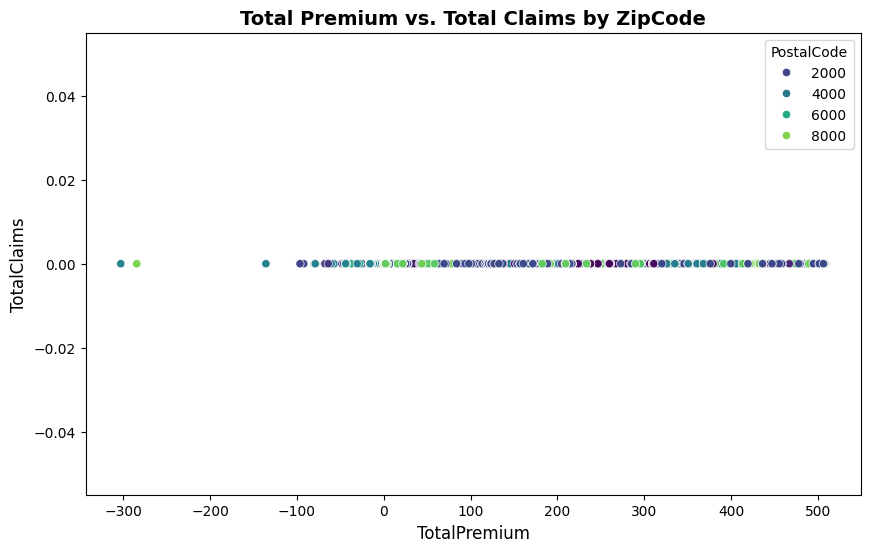

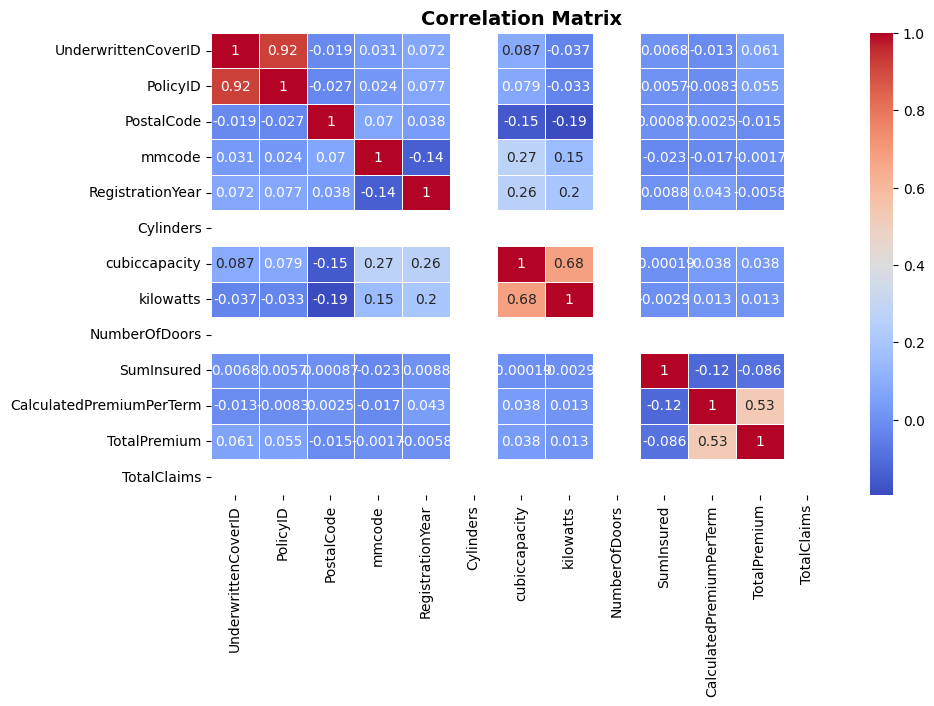

In [16]:
eda.bivariate_analysis()

### Data Comparison

<Figure size 1000x600 with 0 Axes>

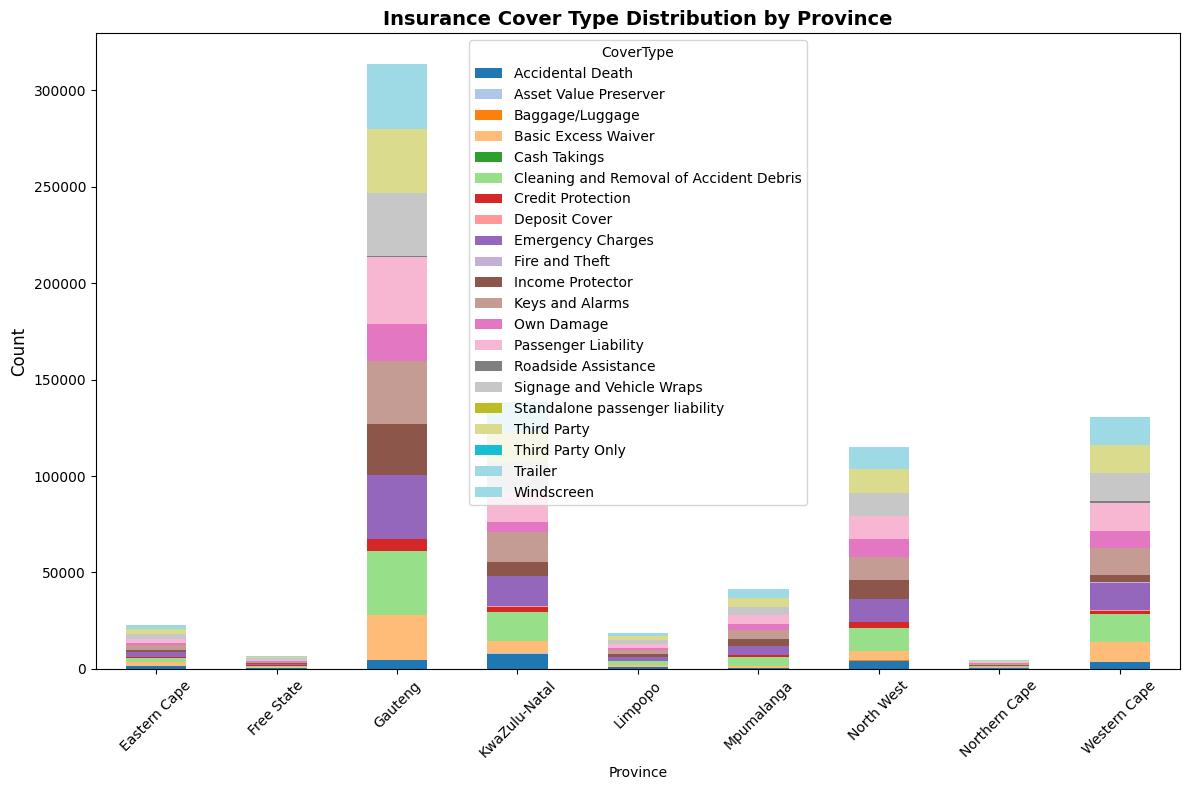

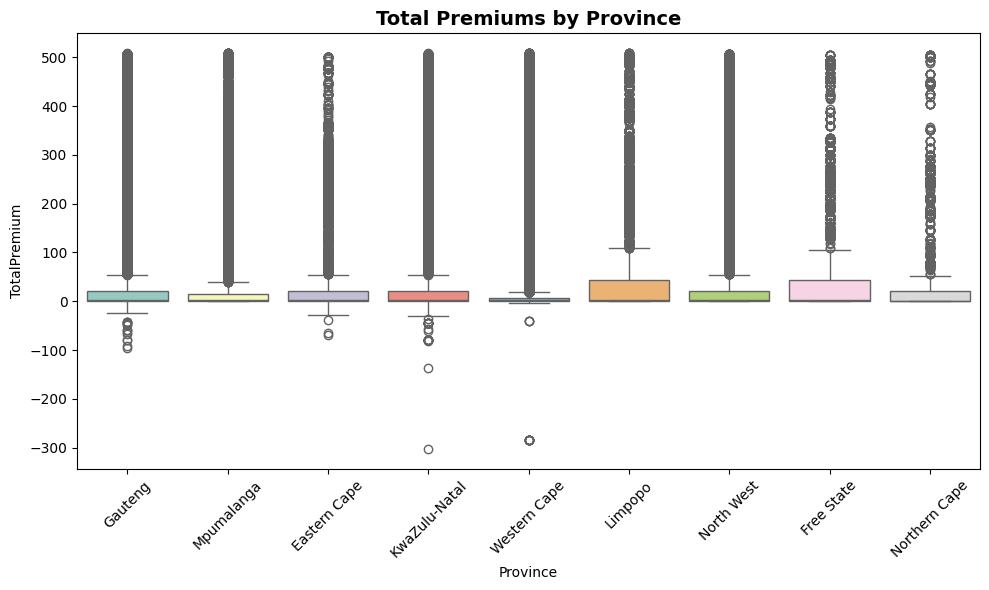

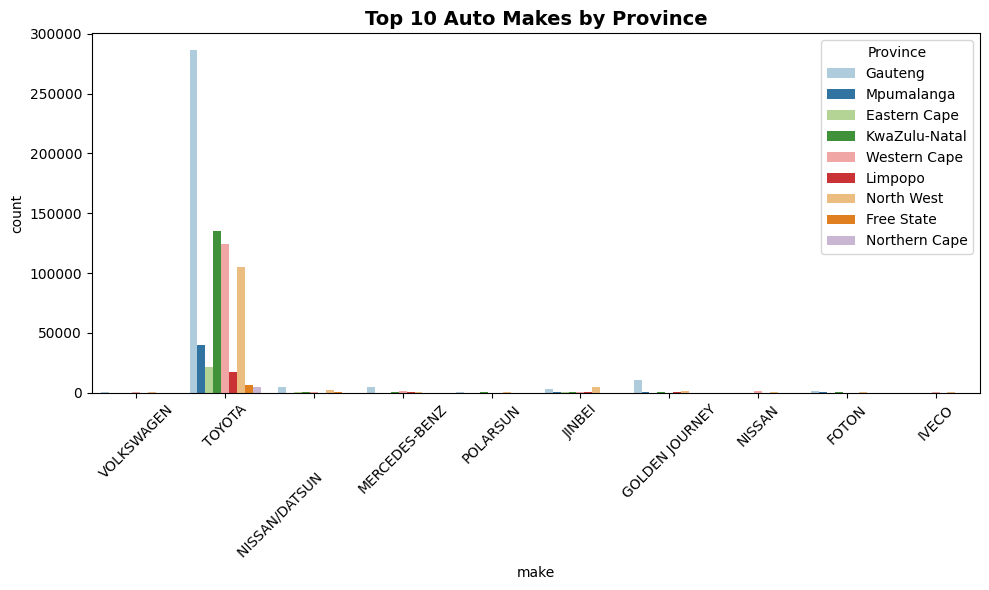

In [16]:
eda.compare_trends('Province')

### Outlier Detection

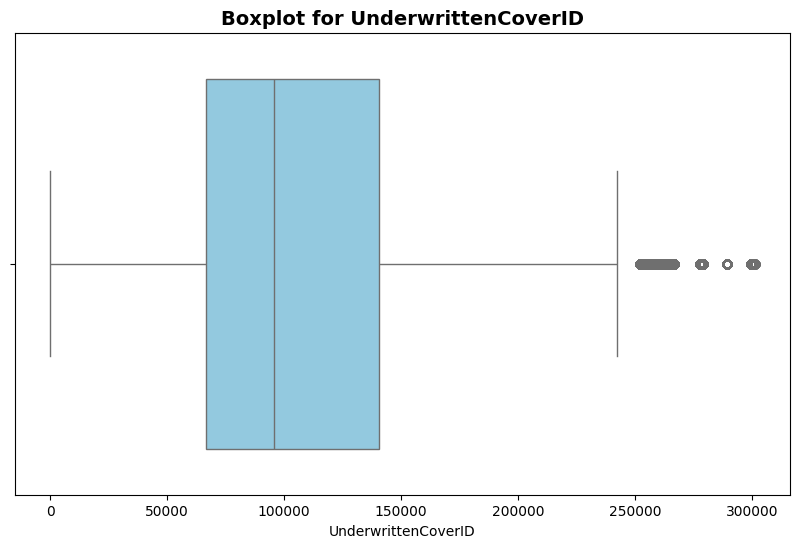

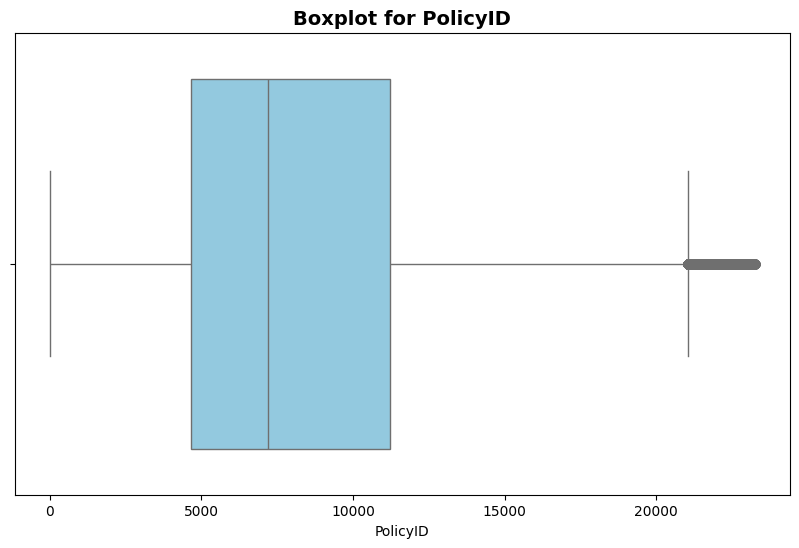

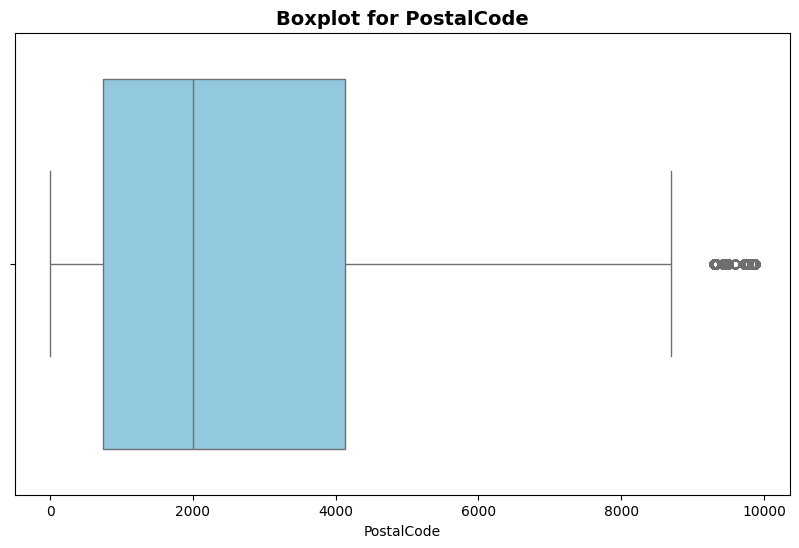

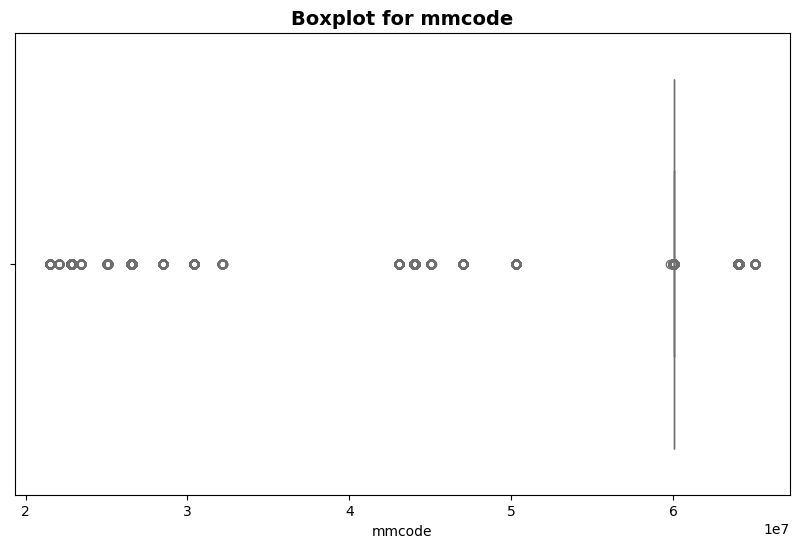

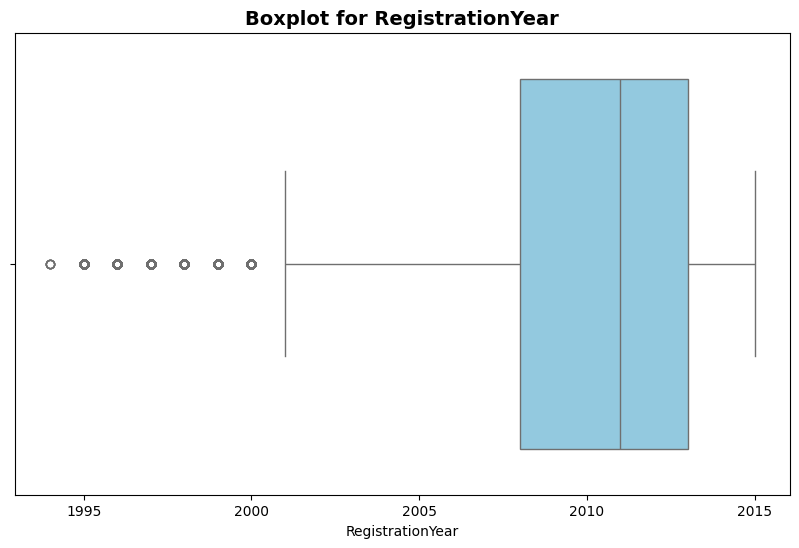

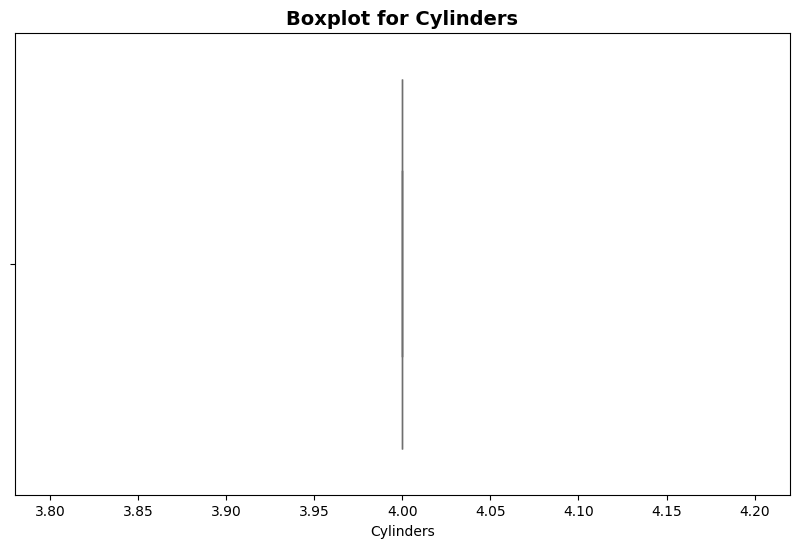

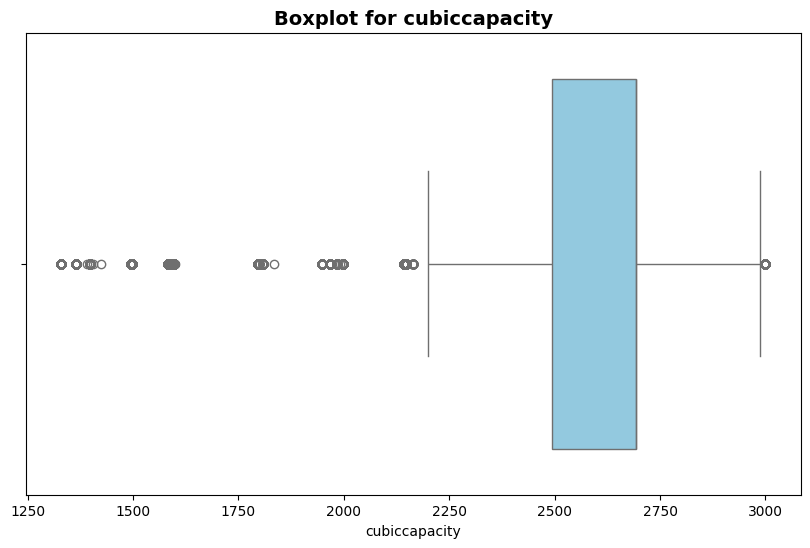

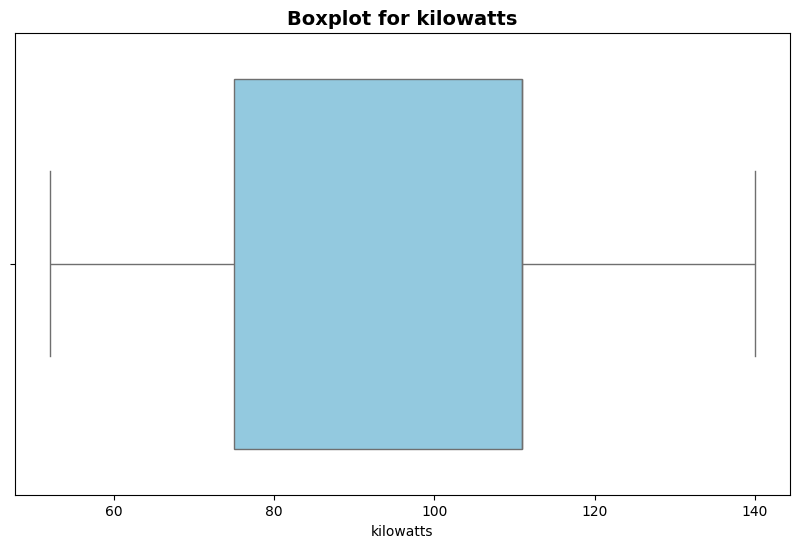

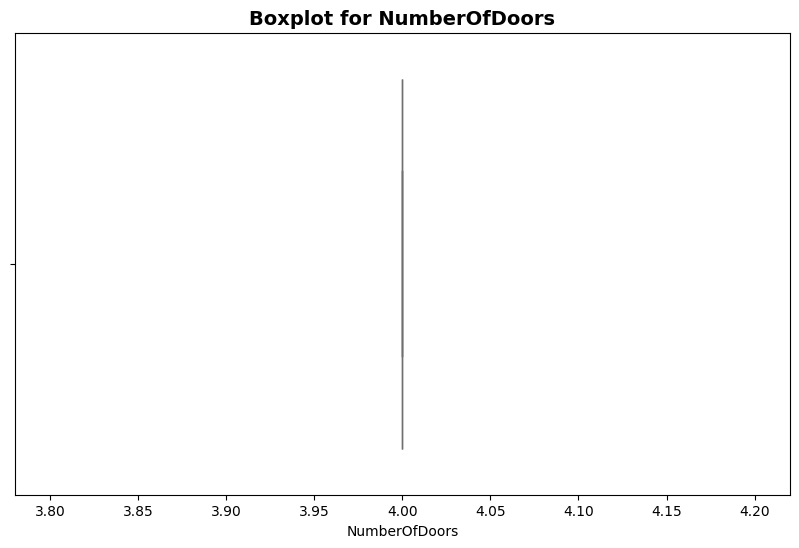

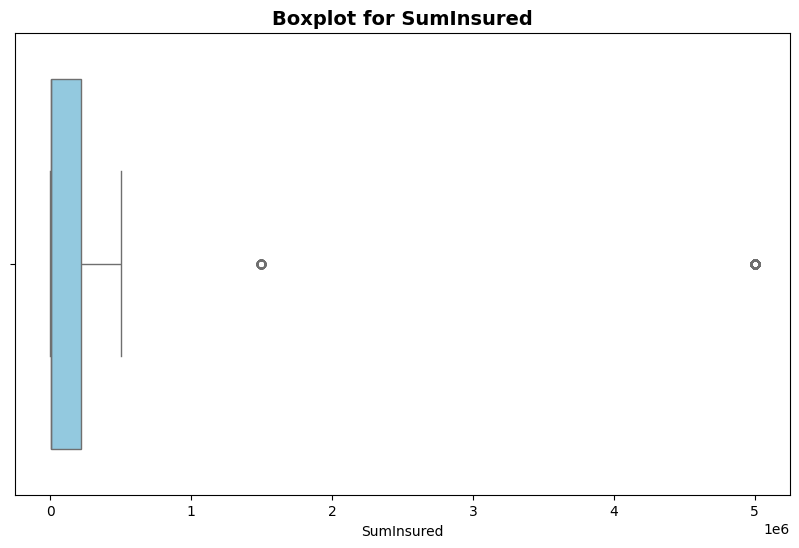

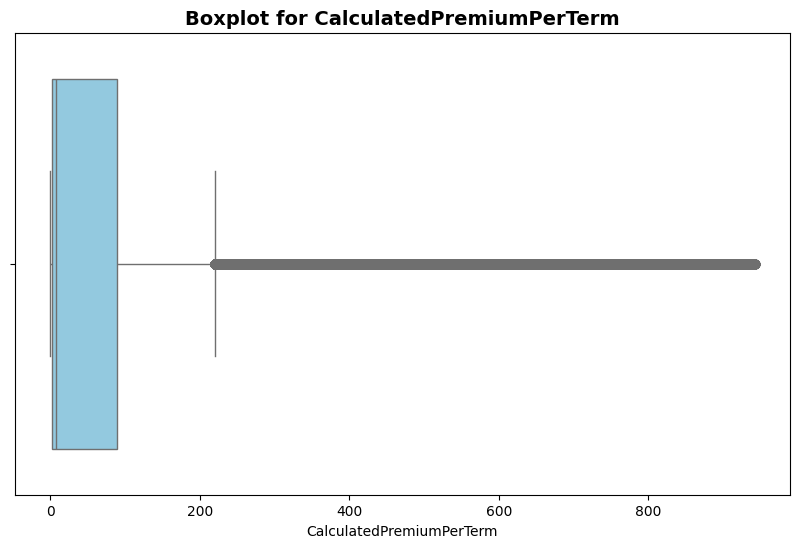

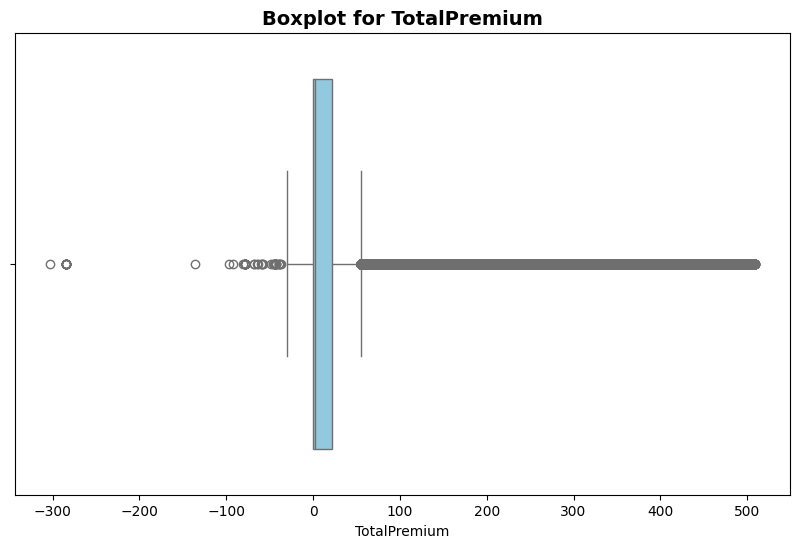

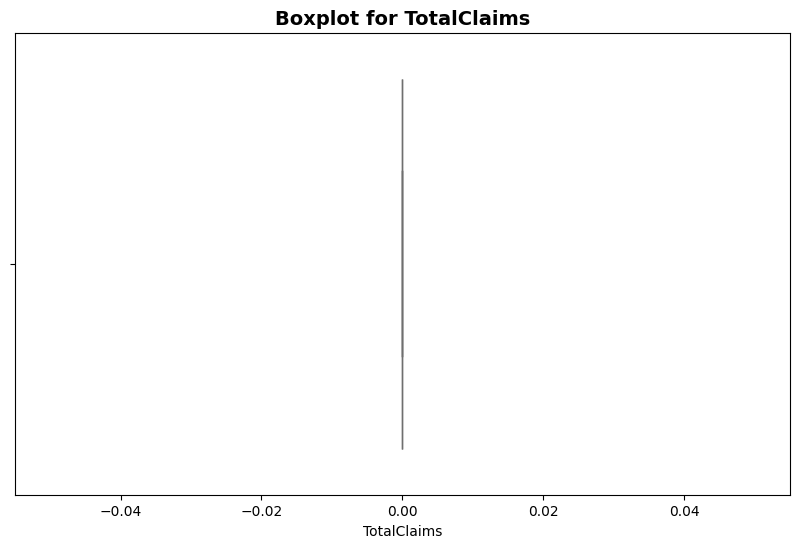

In [17]:
eda.detect_outliers()

## visualize key insights

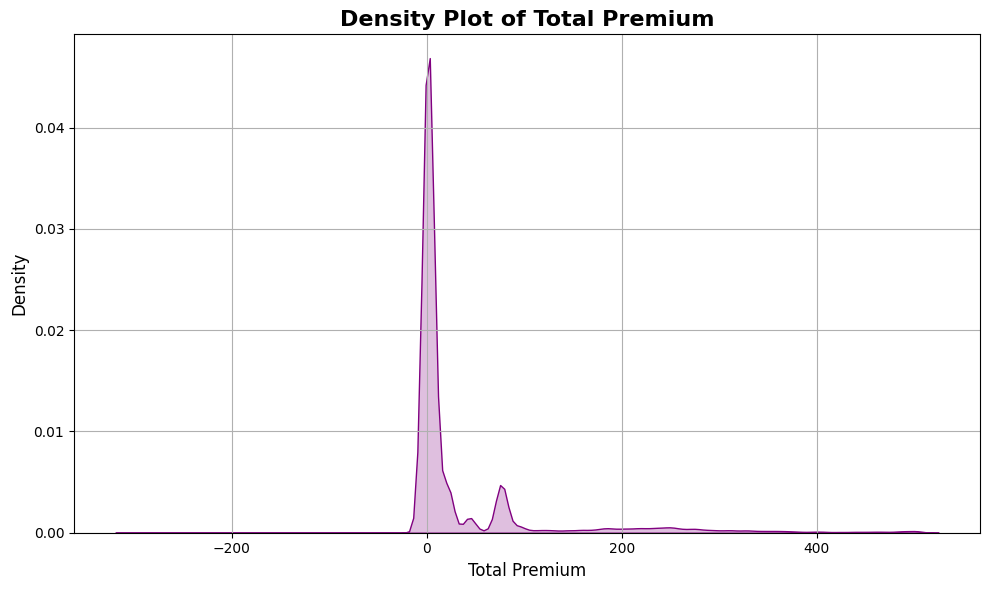

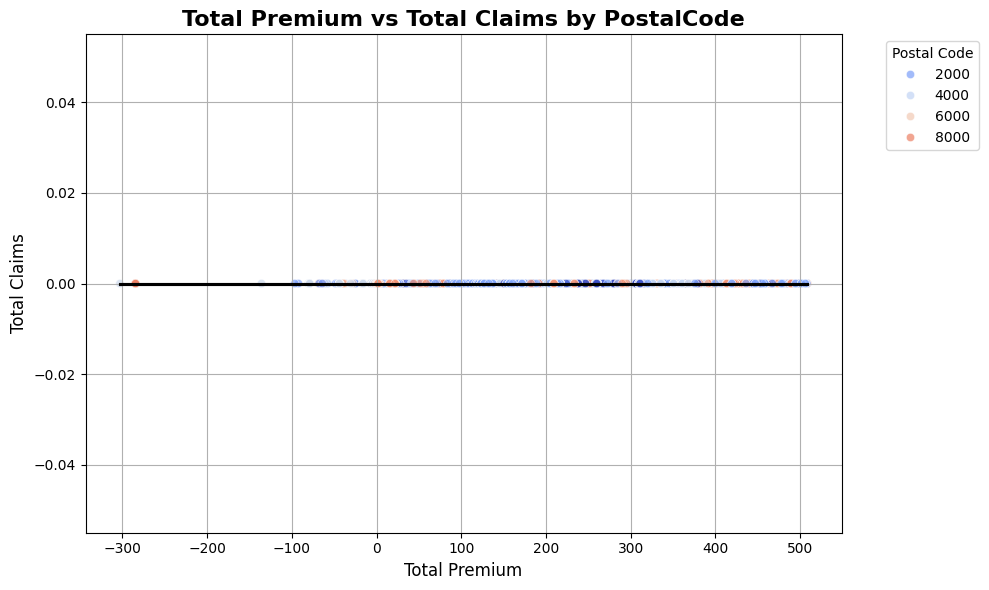

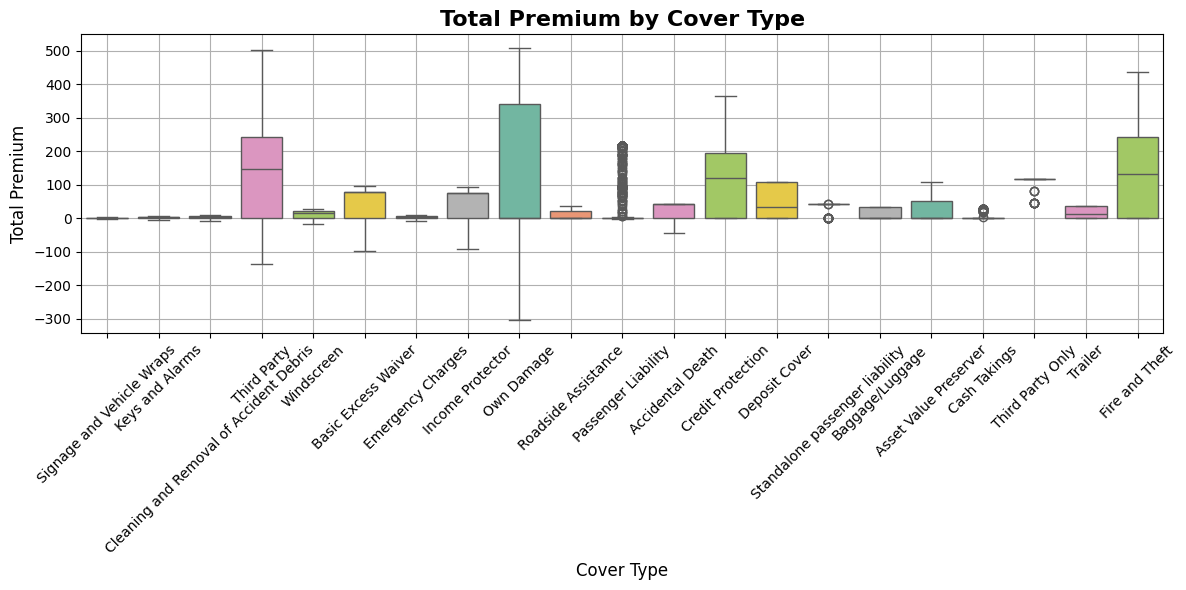

In [15]:
eda.visualize_key_insights()